In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
load_dir = 'res/'
dinf = 1.5
config = 'test_d_inf_' + str(dinf)
fontsize = 15
matplotlib.rcParams.update({'font.size': fontsize})
#all = np.load(load_dir + 'all_' + config + '.npz')

In [8]:
all = np.load(load_dir + 'all_' + config + '.npz')
print(all.files)

cfg = all['config'].reshape(-1)[0]
print(cfg)
k = cfg['k']
eta = cfg['learning_rate']
alpha = cfg['alpha']
d_inf = cfg['d_inf']
p = cfg['n_input']
n_train = cfg['n_train']
w_star_norm = cfg['w_star_norm']
pi = 1-cfg['percent_nonsep'] / 100

train = all['train_acc']
test = all['test_acc']
non_zero_steps = all['non_zero_steps']
F_w = all['F_w']
G_w = all['G_w']
cfg = all['config'].reshape(-1)[0]
d_inf_chosen = all['d_inf_chosen']
x = all['x_train']
y = all['y_train']
sum_d = all['sum_d']
w_learned = all['w_learned']
w_star_direction = all['w_star_direction']
d_inf_chosen = all['d_inf_chosen'].reshape(-1)[0]
sum_d_nzs = all['sum_d_nzs']
d_bar = sum_d / (n_train*pi)

w_star = w_star_norm * w_star_direction
gamma = 1/w_star_norm
nonsep_lim = gamma - gamma*d_inf
vi = 1 / np.sqrt(2*k)
w_max = 1 / np.sqrt(2*k)


['config', 'sum_d_nzs', 'train_acc', 'w_star_direction', 'sum_d', 'G_w', 'w_learned', 'd_inf_chosen', 'non_zero_steps', 'test_acc', 'avg_costs', 'y_train', 'x_train', 'F_w']
{'alpha': 0.3, 'n_train': 1000, 'd_inf': 1.5, 'percent_nonsep': 0, 'training_epochs': 100000, 'beta': 0, 'print_step': 50, 'save_step': 1, 'name': 'test_d_inf_1.5', 'n_test': 1000, 'learning_rate': 0.09, 'batch_size': 1, 'n_input': 10, 'break_thresh': 0, 'w_star_norm': 3, 'k': 200}


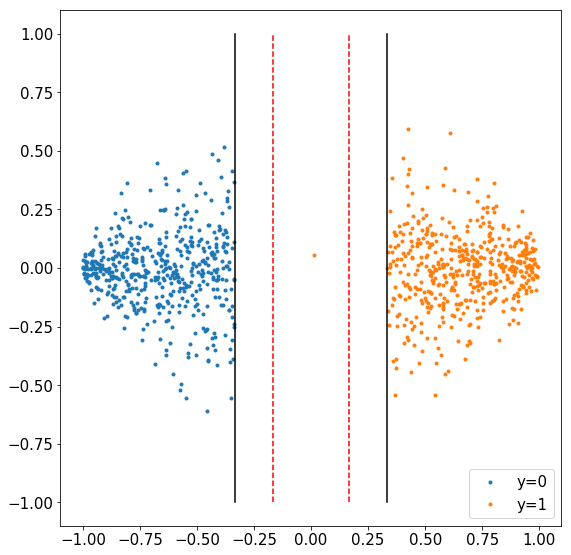

In [9]:
w_rand_direction = rn.normal(0, 1, p)
w_rand_direction = w_rand_direction - np.dot(w_rand_direction, w_star_direction) * w_star_direction
w_rand_direction = w_rand_direction / np.sqrt(np.sum(w_rand_direction**2))
w_rand_direction_tile = np.tile(w_rand_direction, (n, 1))
x_rand_proj = np.sum(x * w_rand_direction_tile, axis=1)

w_star_direction_tile = np.tile(w_star_direction, (n, 1))
x_star_proj = np.sum(x * w_star_direction_tile, axis=1)

plot_x, plot_y = 8, 8
n0, n1 = 1, 1
fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)

ax = axes
ax.plot(x_star_proj[np.argwhere(y==0)], x_rand_proj[np.argwhere(y==0)],'.',label='y=0')
ax.plot(x_star_proj[np.argwhere(y==1)], x_rand_proj[np.argwhere(y==1)],'.',label='y=1')
ax.plot([-1/w_star_norm, -1/w_star_norm], [-1,1], '-k')
ax.plot([1/w_star_norm, 1/w_star_norm], [-1,1], '-k')
ax.plot([-nonsep_lim, -nonsep_lim], [-1,1], '--r')
ax.plot([nonsep_lim, nonsep_lim], [-1,1], '--r')
ax.legend(loc=4)

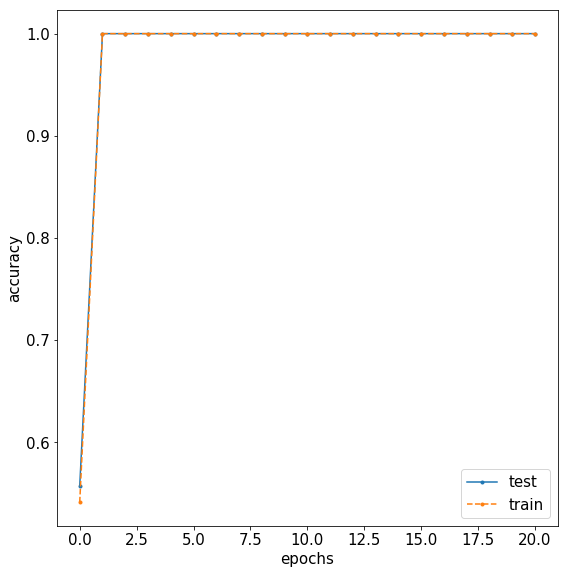

In [212]:
plot_x, plot_y = 8, 8
n0, n1 = 1, 1

fig, axes = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
    
ax = axes
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(test, '-', label = 'test')
ax.plot(train[:,0], '-', label = 'train')
ax.legend()

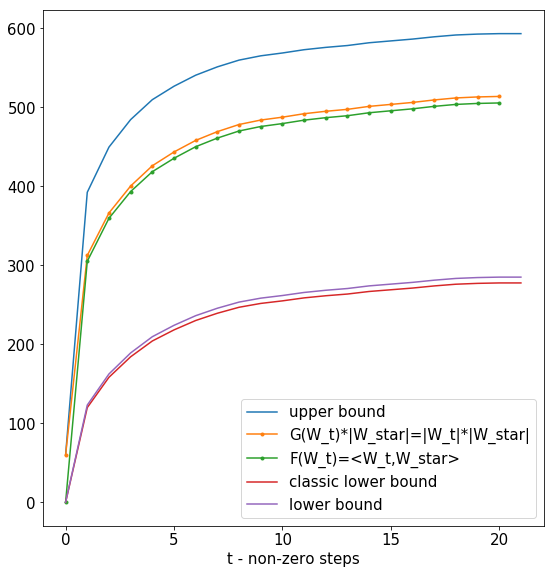

In [228]:
plot_x, plot_y = 8, 8
n0, n1 = 1, 1
fig, ax = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
max_ind = 100#len(G_w)

total_nzs = [np.insert(np.cumsum(non_zero_steps[:,i]),0, 0) for i in range(3)]
T = total_nzs[0]
W_star_norm = w_star_norm * np.sqrt(2*k)
upper_bound = np.sqrt(G_w[0]**2 + T*(2*k*eta**2*vi**2+2*eta))*W_star_norm
classic_lower_bound = F_w[0] + 2*k*eta*vi*alpha*T
lower_bound =         F_w[0] + 2*k*eta*vi*T * (alpha - (1-pi)*d_bar)

ax.set_xlabel('t - non-zero steps')
ax.plot(upper_bound[:max_ind], label='upper bound')
ax.plot((G_w*W_star_norm)[:max_ind], '.-', label='G(W_t)*|W_star|=|W_t|*|W_star|')
ax.plot(F_w[:max_ind], '.-', label='F(W_t)=<W_t,W_star>')
ax.plot(classic_lower_bound[:max_ind], label='classic lower bound')
ax.plot(lower_bound[:max_ind], label='lower bound')
ax.legend()

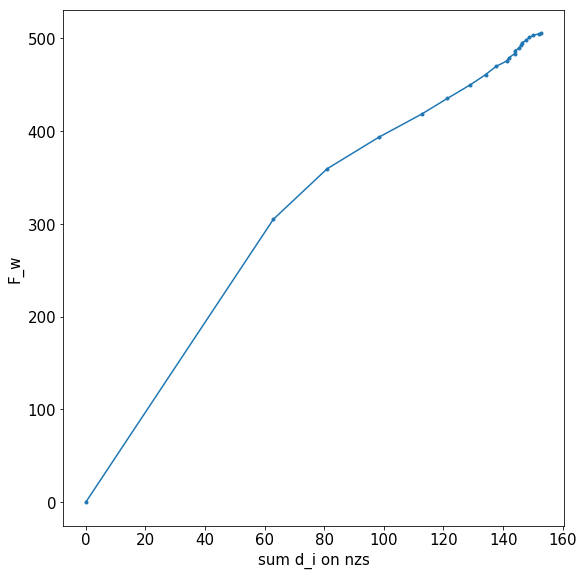

In [182]:
plot_x, plot_y = 8, 8
n0, n1 = 1, 1
fig, ax = plt.subplots(figsize=(plot_x*n1, plot_y*n0), nrows=n0, ncols = n1)
fig.tight_layout(h_pad = 5)
max_ind = len(G_w)

ax.set_xlabel('sum d_i on nzs')
ax.set_ylabel('F_w')
ax.plot((np.insert(np.cumsum(sum_d_nzs),0,0))[:max_ind], F_w[:max_ind], '.-')
